<a href="https://colab.research.google.com/github/Aaryant31/Credit-Card-Default-Prediction/blob/main/Team_Final_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV path
data='default of credit card clients.csv'

In [3]:
pd.read_csv(data)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [4]:
#reading data
df=pd.read_csv(data)

# Data inspection

In [5]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [6]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [8]:
#describing data
df.describe().transpose()

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

In [9]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [10]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [11]:
#viewing Data
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...          0          0          0         0       689         0   
1      0  ...       3272       3455       3261         0      1000      1000   
2      0  ...      14331      14948      15549      1518      1500      1000   
3      0  ...      28314      28959      29547      2000      2019      1200   
4      0  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 24 columns]

# Data cleaning and EDA

In [12]:
df['LIMIT_BAL'].max()

1000000

In [13]:
df['LIMIT_BAL'].min()

10000

In [14]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [15]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [16]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000    2          2         1   24         2        2       -1   
1     120000    2          2         2   26        -1        2        0   
2      90000    2          2         2   34         0        0        0   
3      50000    2          2         1   37         0        0        0   
4      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2  ...             0             0             0   
1        0        0  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4        0        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689            0            0            0   
1             0         1000         1000         1000            0   
2          1518         1500         1000         1000         1000   
3          2000         2019         1200         1100         1069   
4          2000        36681        10000         9000          689   

   PAY_AMT_APR  Defaulters  
0            0           1  
1         2000           1  
2         5000           0  
3         1000           0  
4          679           0  

[5 rows x 24 columns]

### Looking for Outlier Using Isolation Forest

In [17]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [18]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [19]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [20]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000    2          2         1   24         2        2       -1   
1     120000    2          2         2   26        -1        2        0   
2      90000    2          2         2   34         0        0        0   
3      50000    2          2         1   37         0        0        0   
4      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1       -2  ...             0             0          689   
1        0        0  ...          3261             0         1000   
2        0        0  ...         15549          1518         1500   
3        0        0  ...         29547          2000         2019   
4        0        0  ...         19131          2000        36681   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Defaulters  \
0            0            0            0            0           1   
1         1000         1000            0         2000           1   
2         1000         1000         1000         5000           0   
3         1200         1100         1069         1000           0   
4        10000         9000          689          679           0   

   multivariate_anomaly_score  multivariate_outlier  
0                    0.190476                     1  
1                    0.212437                     1  
2                    0.269715                     1  
3                    0.264108                     1  
4                    0.171549                     1  

[5 rows x 26 columns]

In [21]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
6         500000    1          1         2   29         0        0        0   
59        400000    2          2         1   29         0        0        0   
102       480000    1          1         1   63         0        0        0   
214       470000    1          2         2   27         2        2        2   
360       500000    2          2         2   23         4        3        2   
...          ...  ...        ...       ...  ...       ...      ...      ...   
29605     500000    1          1         1   37         0        0        2   
29820     400000    1          2         2   37         1       -1        0   
29837     500000    1          1         2   34         0        0        0   
29883     420000    1          1         1   34         0        0        0   
29963     610000    1          1         2   31         0       -1        2   

       PAY_JUN  PAY_MAY  ...  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
6            0        0  ...        473944         55000        40000   
59           0        0  ...        364089         17000        15029   
102          2        2  ...        469961         16078        55693   
214          2        0  ...        309959         13000        11001   
360          0        0  ...        419643         10000            0   
...        ...      ...  ...           ...           ...          ...   
29605        0        0  ...        356636         40024          325   
29820        0        0  ...        271385        423903        15100   
29837        0        0  ...        424592         17438        18852   
29883        0        0  ...        489200         20000        24000   
29963       -1       -1  ...        269528        323014         1605   

       PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  Defaulters  \
6            38000        20239        13750        13770           0   
59           30000        12000        12000        23000           0   
102          17000            0        18000        24200           0   
214              0        10484        10838        10367           0   
360          14000        16500        16000        19000           1   
...            ...          ...          ...          ...         ...   
29605        15296        12137        12312        14113           0   
29820        14600        13000         9500         9500           0   
29837        16673        15244        15216        16037           0   
29883        11000        10000            0        11000           0   
29963       349395       250144       271099       220076           0   

       multivariate_anomaly_score  multivariate_outlier  
6                       -0.051680                    -1  
59                      -0.015094                    -1  
102                     -0.078952                    -1  
214                     -0.024130                    -1  
360                     -0.073918                    -1  
...                           ...                   ...  
29605                   -0.047464                    -1  
29820                   -0.057618                    -1  
29837                   -0.032132                    -1  
29883                   -0.028768                    -1  
29963                   -0.136291                    -1  

[300 rows x 26 columns]

In [22]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index)

In [23]:
#checking the shape of df after removing outlier
df.shape

(29700, 26)

# Exploratory Data Analysis and feature Engineering

In [24]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23154
1     6546
Name: Defaulters, dtype: int64

<AxesSubplot:xlabel='Defaulters', ylabel='count'>

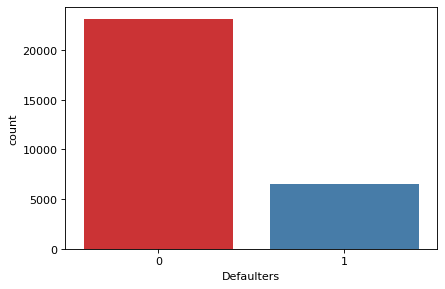

In [25]:
#visualizing dependent variable
plt.figure(dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [26]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [27]:
#creating different df for categorical variable
df_cat = df[categorical_features]


In [28]:
#checking shape of categorical variable
df_cat.shape

(29700, 3)

In [29]:
#looking into categorical df
df_cat.head()

SEX  EDUCATION  MARRIAGE
0    2          2         1
1    2          2         2
2    2          2         2
3    2          2         1
4    1          2         1

In [30]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17963
1    11737
Name: SEX, dtype: int64

count of EDUCATION features

2    13922
1    10437
3     4885
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15838
1    13486
3      322
0       54
Name: MARRIAGE, dtype: int64



In [31]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [32]:
df_cat.head()

SEX   EDUCATION MARRIAGE
0  Female  university  married
1  Female  university   single
2  Female  university   single
3  Female  university  married
4    Male  university  married

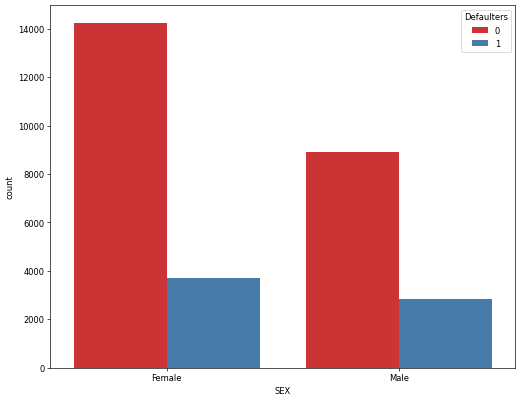

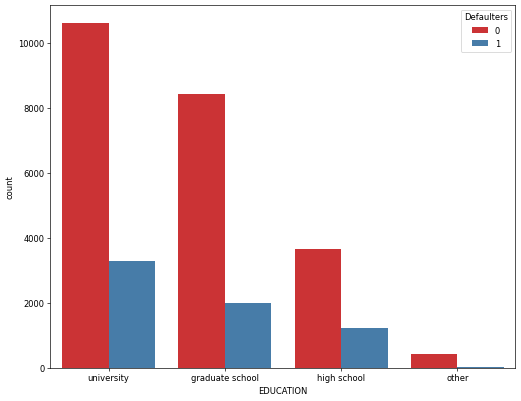

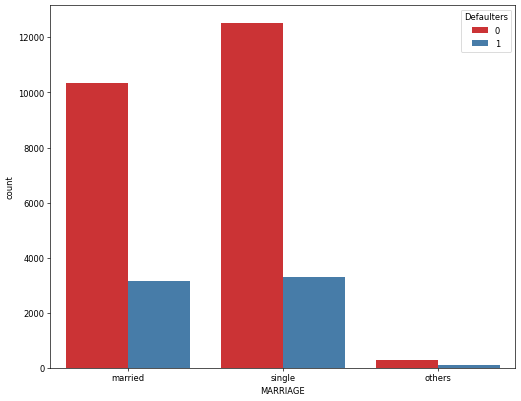

In [33]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette='Set1')
  plt.show()

In [34]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17963
Male      11737
Name: SEX, dtype: int64

count of EDUCATION features

university         13922
graduate school    10437
high school         4885
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15838
married    13486
others       376
Name: MARRIAGE, dtype: int64



In [35]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

In [36]:
df_cat.head()

SEX   EDUCATION MARRIAGE  Defaulter
0  Female  university  married          1
1  Female  university   single          1
2  Female  university   single          0
3  Female  university  married          0
4    Male  university  married          0

In [37]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.206981
1    Male   0.240947
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251382
2            other   0.070175
3       university   0.235957
  MARRIAGE  Defaulter
0  married   0.233872
1   others   0.236702
2   single   0.208549


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [38]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435455
std          9.198810
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [39]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [40]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [41]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000    2          2         1   24         2        2       -1   
1     120000    2          2         2   26        -1        2        0   
2      90000    2          2         2   34         0        0        0   
3      50000    2          2         1   37         0        0        0   
4      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  PAY_MAY  ...  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0       -1       -2  ...             0          689            0            0   
1        0        0  ...             0         1000         1000         1000   
2        0        0  ...          1518         1500         1000         1000   
3        0        0  ...          2000         2019         1200         1100   
4        0        0  ...          2000        36681        10000         9000   

   PAY_AMT_MAY  PAY_AMT_APR  Defaulters  multivariate_anomaly_score  \
0            0            0           1                    0.190476   
1            0         2000           1                    0.212437   
2         1000         5000           0                    0.269715   
3         1069         1000           0                    0.264108   
4          689          679           0                    0.171549   

   multivariate_outlier  age_group  
0                     1      21-30  
1                     1      21-30  
2                     1      31-40  
3                     1      31-40  
4                     1      51-60  

[5 rows x 27 columns]

In [42]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10962
31-40         10606
41-50          5908
51-60          1966
60 & above      258
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='count'>

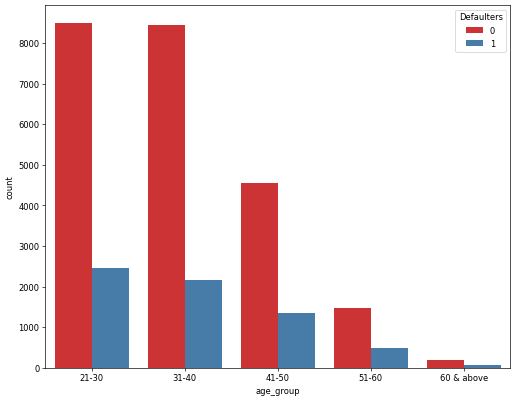

In [43]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters', palette='Set1')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [44]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

age_group  Defaulters
0       21-30    0.224229
1       31-40    0.203564
2       41-50    0.230366
3       51-60    0.252798
4  60 & above    0.275194

### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [45]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [46]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  \
0      20000    2          2         1         2        2       -1       -1   
1     120000    2          2         2        -1        2        0        0   
2      90000    2          2         2         0        0        0        0   
3      50000    2          2         1         0        0        0        0   
4      50000    1          2         1        -1        0       -1        0   

   PAY_MAY  PAY_APR  ...  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  \
0       -2       -2  ...             0          689            0            0   
1        0        2  ...             0         1000         1000         1000   
2        0        0  ...          1518         1500         1000         1000   
3        0        0  ...          2000         2019         1200         1100   
4        0        0  ...          2000        36681        10000         9000   

   PAY_AMT_MAY  PAY_AMT_APR  Defaulters  multivariate_anomaly_score  \
0            0            0           1                    0.190476   
1            0         2000           1                    0.212437   
2         1000         5000           0                    0.269715   
3         1069         1000           0                    0.264108   
4          689          679           0                    0.171549   

   multivariate_outlier  age_group  
0                     1      21-30  
1                     1      21-30  
2                     1      31-40  
3                     1      31-40  
4                     1      51-60  

[5 rows x 26 columns]

In [47]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

PAY_SEPT       PAY_AUG       PAY_JUL       PAY_JUN       PAY_MAY  \
count  29700.000000  29700.000000  29700.000000  29700.000000  29700.000000   
mean      -0.023266     -0.140572     -0.172492     -0.226296     -0.271549   
std        1.113858      1.189198      1.192044      1.166326      1.131761   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

            PAY_APR  
count  29700.000000  
mean      -0.296498  
std        1.148976  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [48]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

PAY_AMT_SEPT   PAY_AMT_AUG    PAY_AMT_JUL    PAY_AMT_JUN  \
count   29700.000000  2.970000e+04   29700.000000   29700.000000   
mean     5358.378047  5.406675e+03    4904.933434    4599.478047   
std     14280.856685  1.613122e+04   14758.116252   14559.000559   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%       990.000000  8.157500e+02     390.000000     283.750000   
50%      2100.000000  2.000000e+03    1791.000000    1500.000000   
75%      5000.000000  5.000000e+03    4360.000000    4000.000000   
max    505000.000000  1.024516e+06  417588.000000  528897.000000   

         PAY_AMT_MAY    PAY_AMT_APR  
count   29700.000000   29700.000000  
mean     4561.223973    4826.430943  
std     14159.246540   15665.870251  
min         0.000000       0.000000  
25%       237.750000     100.000000  
50%      1500.000000    1500.000000  
75%      4000.000000    4000.000000  
max    426529.000000  528666.000000

In [49]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

BILL_AMT_SEPT   BILL_AMT_AUG   BILL_AMT_JUL   BILL_AMT_JUN  \
count   29700.000000   29700.000000   29700.000000   29700.000000   
mean    48179.994916   46164.947912   43873.935421   40258.277104   
std     65642.197006   62954.356763   60427.570373   55956.697295   
min   -165580.000000  -69777.000000 -157264.000000 -170000.000000   
25%      3457.750000    2895.500000    2551.000000    2250.000000   
50%     21706.000000   20650.000000   19779.500000   18783.000000   
75%     64829.000000   61729.750000   58425.500000   52032.000000   
max    746814.000000  512650.000000  855086.000000  628699.000000   

        BILL_AMT_MAY   BILL_AMT_APR  
count   29700.000000   29700.000000  
mean    37494.355690   36265.737104  
std     52716.217836   52097.663795  
min    -81334.000000 -339603.000000  
25%      1699.750000    1200.000000  
50%     17860.000000   16703.500000  
75%     49123.750000   48278.500000  
max    514114.000000  499100.000000

<AxesSubplot:xlabel='Defaulters', ylabel='LIMIT_BAL'>

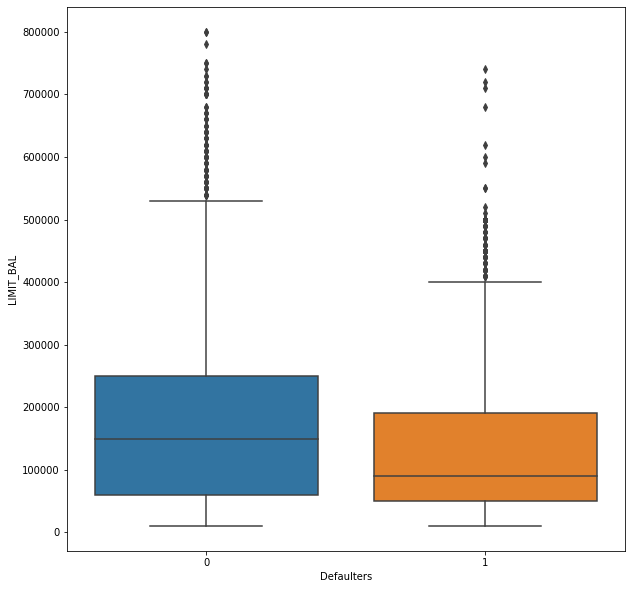

In [50]:
#Checking the outliers in the data
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

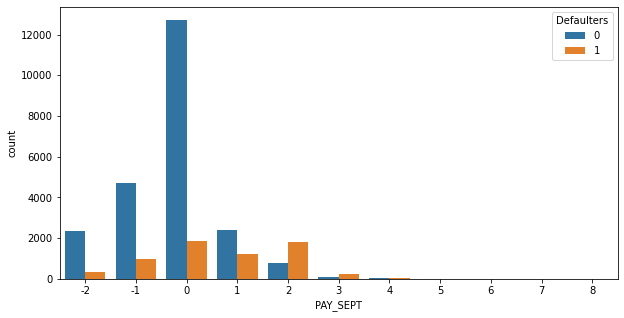

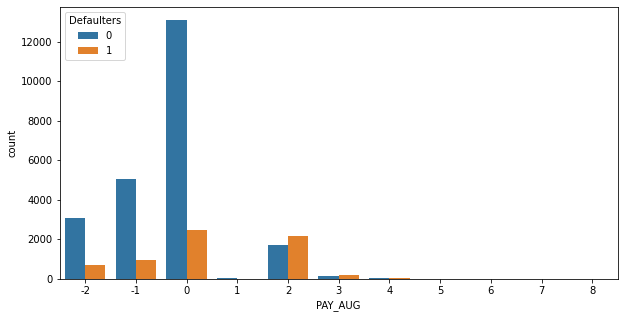

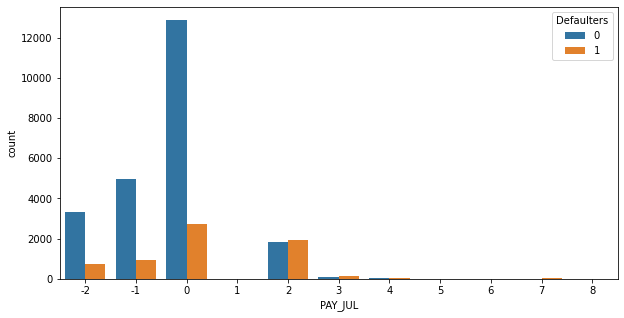

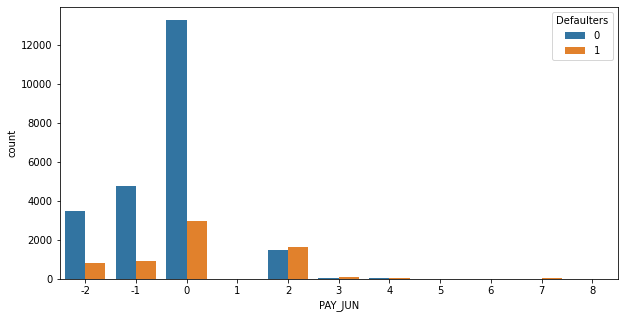

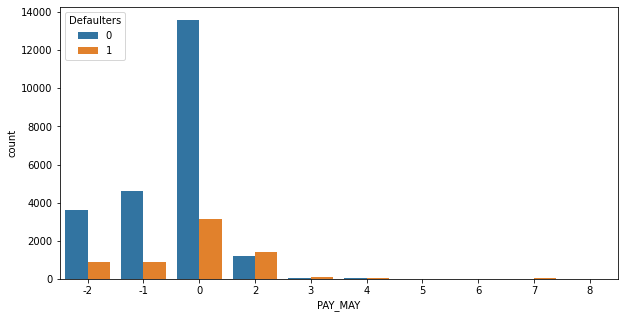

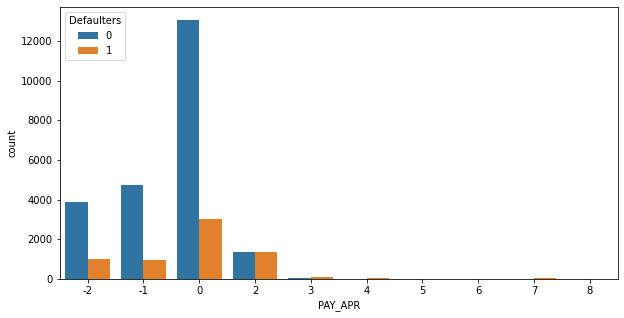

In [51]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

# 

In [52]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [53]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

In [54]:
#looking into independent variable
X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  \
0      20000    2          2         1         2        2       -1       -1   
1     120000    2          2         2        -1        2        0        0   
2      90000    2          2         2         0        0        0        0   
3      50000    2          2         1         0        0        0        0   
4      50000    1          2         1        -1        0       -1        0   

   PAY_MAY  PAY_APR  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -2       -2  ...             0             0             0   
1        0        2  ...          3272          3455          3261   
2        0        0  ...         14331         14948         15549   
3        0        0  ...         28314         28959         29547   
4        0        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689            0            0            0   
1             0         1000         1000         1000            0   
2          1518         1500         1000         1000         1000   
3          2000         2019         1200         1100         1069   
4          2000        36681        10000         9000          689   

   PAY_AMT_APR  age_group  
0            0      21-30  
1         2000      21-30  
2         5000      31-40  
3         1000      31-40  
4          679      51-60  

[5 rows x 23 columns]

In [55]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [56]:
X.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0      20000  Female  university  married         2        2       -1   
1     120000  Female  university   single        -1        2        0   
2      90000  Female  university   single         0        0        0   
3      50000  Female  university  married         0        0        0   
4      50000    Male  university  married        -1        0       -1   

   PAY_JUN  PAY_MAY  PAY_APR  ...  BILL_AMT_JUN  BILL_AMT_MAY  BILL_AMT_APR  \
0       -1       -2       -2  ...             0             0             0   
1        0        0        2  ...          3272          3455          3261   
2        0        0        0  ...         14331         14948         15549   
3        0        0        0  ...         28314         28959         29547   
4        0        0        0  ...         20940         19146         19131   

   PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
0             0          689            0            0            0   
1             0         1000         1000         1000            0   
2          1518         1500         1000         1000         1000   
3          2000         2019         1200         1100         1069   
4          2000        36681        10000         9000          689   

   PAY_AMT_APR  age_group  
0            0      21-30  
1         2000      21-30  
2         5000      31-40  
3         1000      31-40  
4          679      51-60  

[5 rows x 23 columns]

In [57]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [58]:
X.head()

LIMIT_BAL  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0      20000         2        2       -1       -1       -2       -2   
1     120000        -1        2        0        0        0        2   
2      90000         0        0        0        0        0        0   
3      50000         0        0        0        0        0        0   
4      50000        -1        0       -1        0        0        0   

   BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  ...  EDUCATION_other  \
0           3913          3102           689  ...                0   
1           2682          1725          2682  ...                0   
2          29239         14027         13559  ...                0   
3          46990         48233         49291  ...                0   
4           8617          5670         35835  ...                0   

   EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  \
0                     1                 1                0                0   
1                     1                 0                0                1   
2                     1                 0                0                1   
3                     1                 1                0                0   
4                     1                 1                0                0   

   age_group_21-30  age_group_31-40  age_group_41-50  age_group_51-60  \
0                1                0                0                0   
1                1                0                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                0                0                1   

   age_group_60 & above  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 33 columns]

In [59]:
#spliting Dependent variable
y=df['Defaulters']

In [60]:
df_final=X.copy()

In [61]:
df_final.head()

LIMIT_BAL  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0      20000         2        2       -1       -1       -2       -2   
1     120000        -1        2        0        0        0        2   
2      90000         0        0        0        0        0        0   
3      50000         0        0        0        0        0        0   
4      50000        -1        0       -1        0        0        0   

   BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  ...  EDUCATION_other  \
0           3913          3102           689  ...                0   
1           2682          1725          2682  ...                0   
2          29239         14027         13559  ...                0   
3          46990         48233         49291  ...                0   
4           8617          5670         35835  ...                0   

   EDUCATION_university  MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  \
0                     1                 1                0                0   
1                     1                 0                0                1   
2                     1                 0                0                1   
3                     1                 1                0                0   
4                     1                 1                0                0   

   age_group_21-30  age_group_31-40  age_group_41-50  age_group_51-60  \
0                1                0                0                0   
1                1                0                0                0   
2                0                1                0                0   
3                0                1                0                0   
4                0                0                0                1   

   age_group_60 & above  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 33 columns]

In [62]:
df_final['Defaulters']=df['Defaulters']

In [63]:
df_final

LIMIT_BAL  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
0          20000         2        2       -1       -1       -2       -2   
1         120000        -1        2        0        0        0        2   
2          90000         0        0        0        0        0        0   
3          50000         0        0        0        0        0        0   
4          50000        -1        0       -1        0        0        0   
...          ...       ...      ...      ...      ...      ...      ...   
29995     220000         0        0        0        0        0        0   
29996     150000        -1       -1       -1       -1        0        0   
29997      30000         4        3        2       -1        0        0   
29998      80000         1       -1        0        0        0       -1   
29999      50000         0        0        0        0        0        0   

       BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  ...  EDUCATION_university  \
0               3913          3102           689  ...                     1   
1               2682          1725          2682  ...                     1   
2              29239         14027         13559  ...                     1   
3              46990         48233         49291  ...                     1   
4               8617          5670         35835  ...                     1   
...              ...           ...           ...  ...                   ...   
29995         188948        192815        208365  ...                     0   
29996           1683          1828          3502  ...                     0   
29997           3565          3356          2758  ...                     1   
29998          -1645         78379         76304  ...                     0   
29999          47929         48905         49764  ...                     1   

       MARRIAGE_married  MARRIAGE_others  MARRIAGE_single  age_group_21-30  \
0                     1                0                0                1   
1                     0                0                1                1   
2                     0                0                1                0   
3                     1                0                0                0   
4                     1                0                0                0   
...                 ...              ...              ...              ...   
29995                 1                0                0                0   
29996                 0                0                1                0   
29997                 0                0                1                0   
29998                 1                0                0                0   
29999                 1                0                0                0   

       age_group_31-40  age_group_41-50  age_group_51-60  \
0                    0                0                0   
1                    0                0                0   
2                    1                0                0   
3                    1                0                0   
4                    0                0                1   
...                ...              ...              ...   
29995                1                0                0   
29996                0                1                0   
29997                1                0                0   
29998                0                1                0   
29999                0                1                0   

       age_group_60 & above  Defaulters  
0                         0           1  
1                         0           1  
2                         0           0  
3                         0           0  
4                         0           0  
...                     ...         ...  
29995                     0           0  
29996                     0           0  
29997                     0           1  
29998                     0           1  
29999                     0          

## Correlation Heatmap 

<AxesSubplot:>

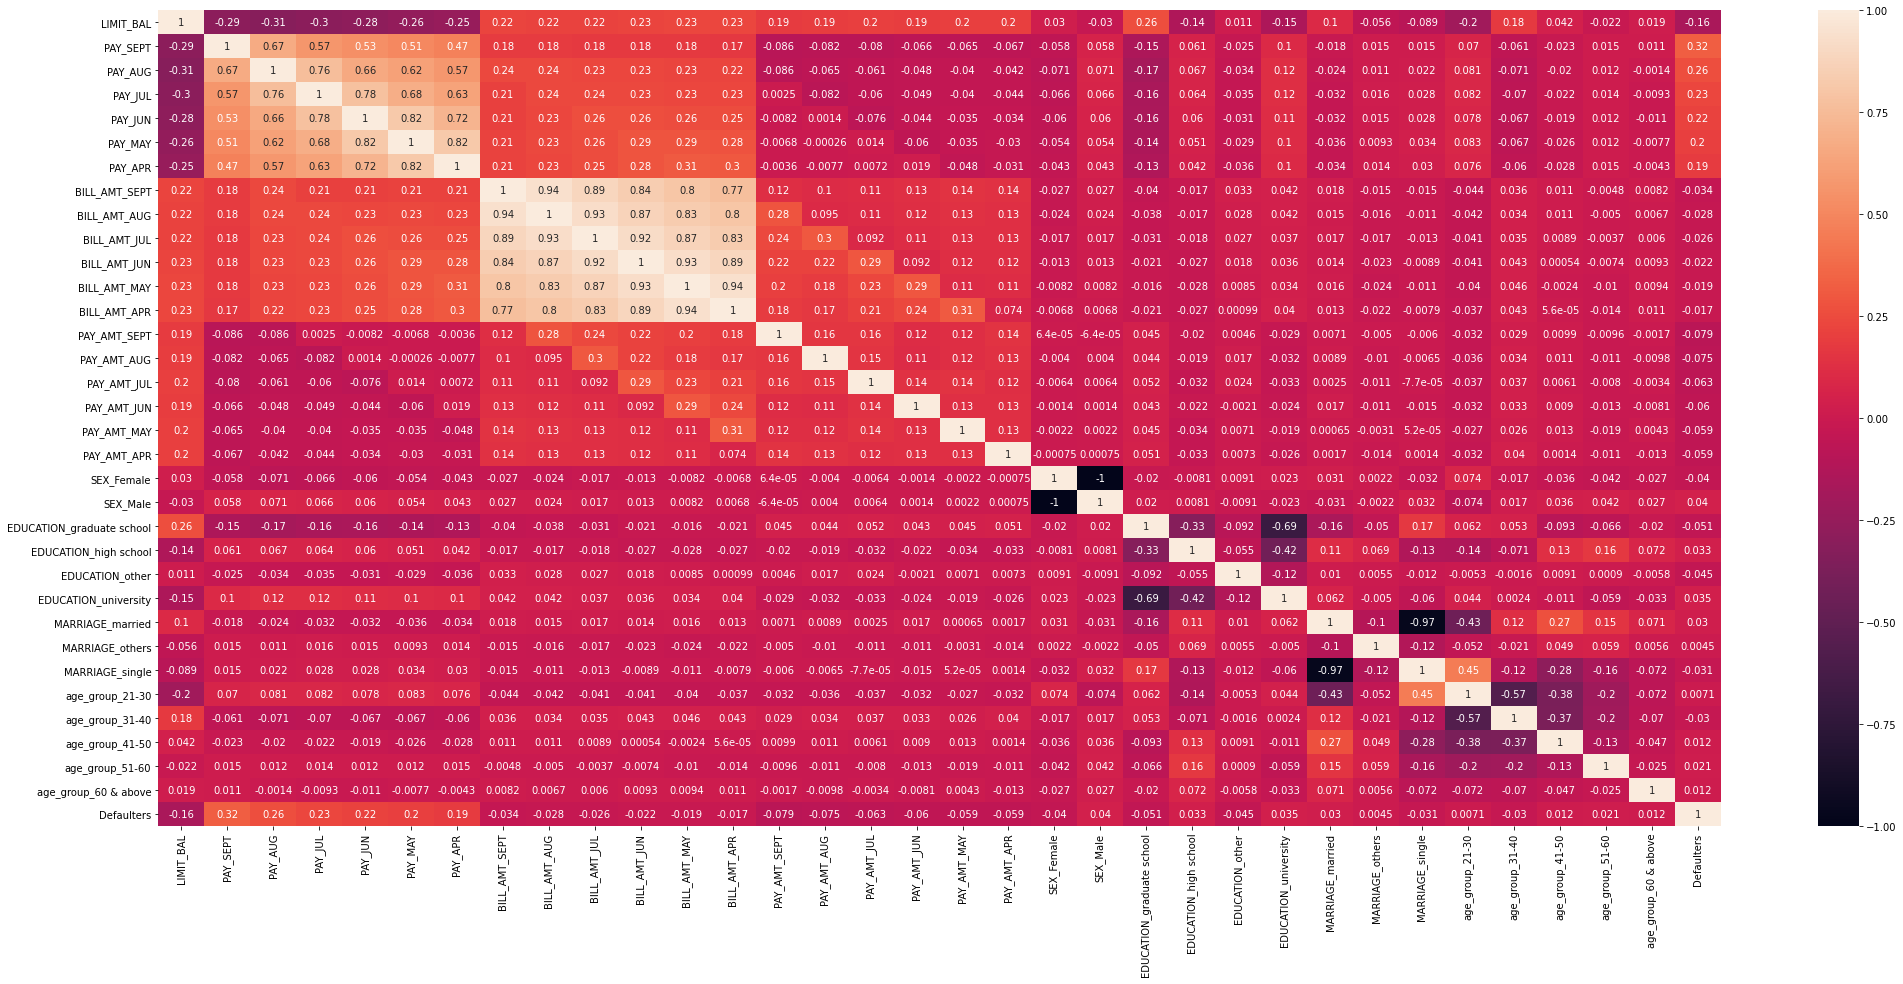

In [64]:
plt.figure(figsize=(35,15))
sns.heatmap(df_final.corr(), annot=True)

## Handling Imbalanced Dataset 

- Method used is SMOTE

In [65]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46308


In [66]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23154],
       [    1, 23154]], dtype=int64)

<AxesSubplot:xlabel='Defaulters', ylabel='count'>

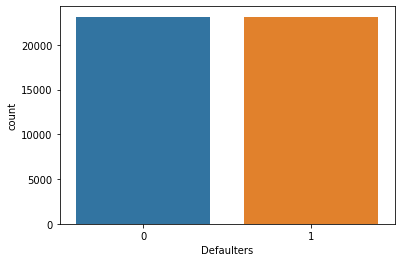

In [67]:
sns.countplot(y_smote)

## Train | Test Split

In [68]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [69]:
#looking into independent variable of train dataset
X_train

LIMIT_BAL  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  PAY_APR  \
33806      73937         0        0        0        0        0        0   
29971      30000         1        2        2        1        1        1   
453       180000         0        0        0        0        0        0   
21399     100000         1        2        0        0        0        2   
1652      290000        -1       -1       -1       -1       -1        0   
...          ...       ...      ...      ...      ...      ...      ...   
5695       30000         0        0        0        0        0        0   
8006      200000        -1       -1        0        0        0        0   
17745      10000         3        2        2        3        3        3   
17931     100000         0        0        0        0        0        0   
45919      20000         2        2        2        2        0        0   

       BILL_AMT_SEPT  BILL_AMT_AUG  BILL_AMT_JUL  ...  EDUCATION_other  \
33806          71438         72821         23980  ...                0   
29971          15105         16163         17069  ...                0   
453           152510        151651        159019  ...                0   
21399           7127          6867          8095  ...                0   
1652            1520          1200             0  ...                0   
...              ...           ...           ...  ...              ...   
5695           23819         15367         10159  ...                0   
8006            1674          7398          6867  ...                0   
17745           1050          1050          1050  ...                0   
17931          81210         78785         69138  ...                0   
45919          10294         10425         11597  ...                0   

       EDUCATION_university  MARRIAGE_married  MARRIAGE_others  \
33806                     1                 0                0   
29971                     1                 0                0   
453                       1                 1                0   
21399                     1                 0                0   
1652                      0                 0                0   
...                     ...               ...              ...   
5695                      1                 1                0   
8006                      0                 0                0   
17745                     1                 1                0   
17931                     0                 0                0   
45919                     0                 0                0   

       MARRIAGE_single  age_group_21-30  age_group_31-40  age_group_41-50  \
33806                0                0                0                0   
29971                1                0                0                0   
453                  0                0                1                0   
21399                1                1                0                0   
1652                 1                0                1                0   
...                ...              ...              ...              ...   
5695                 0                0                1                0   
8006                 1                1                0                0   
17745                0                0                1                0   
17931                1                0                1                0   
45919                1                0                0                0   

       age_group_51-60  age_group_60 & above  
33806                0                     0  
29971                0                     0  
453                  0                     0  
21399                0                     0  
1652                 0                     0  
...                ...                   ...  
5695                 0                     0  
8006                 0                     0  
17745                0                     0  
17931                0       

In [70]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [71]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [72]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))
  print('\nClassification Report')


In [73]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [74]:
#  importing lime 
import lime
import lime.lime_tabular

In [75]:
# LIME SECTION

def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  # creating a data frame to store all the independent features
  X=df_final.drop(dependent_var,axis=1)
  # fetching all the features name from independent variable
  feature_names =list(X.columns)

  # setting up the lime tablular 
  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict_proba, num_features=num_features)
  # showing the lime graph on the screen 
  exp.show_in_notebook(show_table=True)


# creating function to get feature importance 

In [76]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [77]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [78]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [79]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.0142min 

score matrix for train
********************************************************************************
The accuracy is  0.8668336644496272
The precision is  0.9540805378728274
The recall is  0.7700611938575223
The f1 is  0.8522505830112131
the auc  is  0.8665918583452697

confusion_matrix 
  [[16767   642]
 [ 3983 13339]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17409
           1       0.95      0.77      0.85     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.87      0.87     34731
weighted avg       0.88      0.87      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8630042325300165
The precision is  0.953438701409654
The recall is  0.7654320987654321
The f1 is  0.8491535096062394
the auc  is  0.8637430293653096

confusion_matrix 
  [[5

### implementing GridSearch for Hyperparameter Tuning

In [80]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [81]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [82]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.268min 

score matrix for train
********************************************************************************
The accuracy is  0.8676974460856296
The precision is  0.9509602437814471
The recall is  0.7746795981988223
The f1 is  0.8538160531925046
the auc  is  0.8674650216854299

confusion_matrix 
  [[16717   692]
 [ 3903 13419]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17409
           1       0.95      0.77      0.85     17322

    accuracy                           0.87     34731
   macro avg       0.88      0.87      0.87     34731
weighted avg       0.88      0.87      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8636952578388184
The precision is  0.9498730964467005
The recall is  0.7700617283950617
The f1 is  0.850568181818

In [83]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-0.0612612 ,  0.5901946 ,  0.10242539,  0.0505726 ,  0.03149243,
         0.0629603 , -0.00179697, -0.27081962,  0.02819238,  0.07934908,
         0.03344271, -0.00995943,  0.02475791, -0.12429882, -0.21048216,
        -0.05394026, -0.04551792, -0.05932956, -0.07136868, -1.27792774,
        -1.16091675, -1.12809381, -0.88914437, -0.36645964, -1.26839453,
        -1.10570019, -0.23949014, -1.21360197, -1.28093274, -1.23244048,
        -0.96372075, -0.59319768, -0.19530764]])

In [84]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [85]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [86]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [87]:
imp_feat

Features  Importance
28            age_group_21-30    1.280933
19                 SEX_Female    1.277928
24       EDUCATION_university    1.268395
29            age_group_31-40    1.232440
27            MARRIAGE_single    1.213602
20                   SEX_Male    1.160917
21  EDUCATION_graduate school    1.128094
25           MARRIAGE_married    1.105700
30            age_group_41-50    0.963721
22      EDUCATION_high school    0.889144

==========================Features Importance============================

 [[-0.0612612   0.5901946   0.10242539  0.0505726   0.03149243  0.0629603
  -0.00179697 -0.27081962  0.02819238  0.07934908  0.03344271 -0.00995943
   0.02475791 -0.12429882 -0.21048216 -0.05394026 -0.04551792 -0.05932956
  -0.07136868 -1.27792774 -1.16091675 -1.12809381 -0.88914437 -0.36645964
  -1.26839453 -1.10570019 -0.23949014 -1.21360197 -1.28093274 -1.23244048
  -0.96372075 -0.59319768 -0.19530764]]



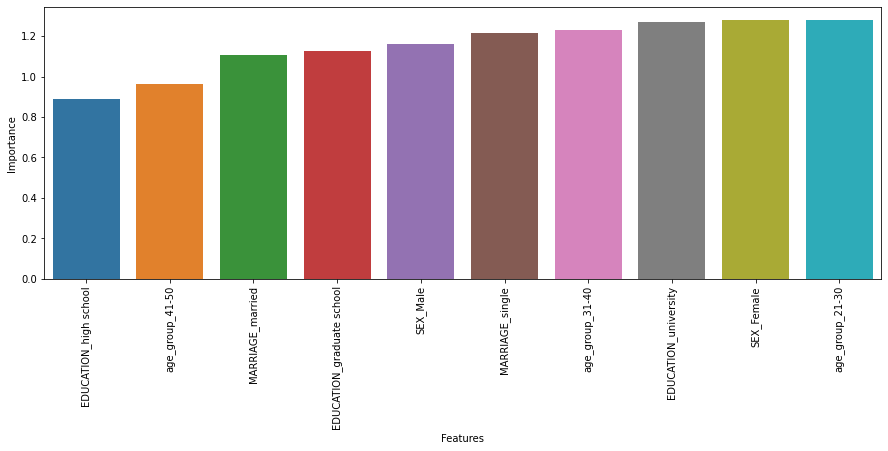

In [88]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [89]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [90]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0097min 

score matrix for train
********************************************************************************
The accuracy is  0.8250266332671101
The precision is  0.8672196460061393
The recall is  0.766539660547281
The f1 is  0.8137774645297705
the auc  is  0.8248804914259179

confusion_matrix 
  [[15376  2033]
 [ 4044 13278]]

Classification Report

              precision    recall  f1-score   support

           0       0.79      0.88      0.83     17409
           1       0.87      0.77      0.81     17322

    accuracy                           0.83     34731
   macro avg       0.83      0.82      0.82     34731
weighted avg       0.83      0.83      0.82     34731



score matrix for test
********************************************************************************
The accuracy is  0.822147361147102
The precision is  0.8645410628019323
The recall is  0.7671467764060357
The f1 is  0.8129372217679659
the auc  is  0.8225638146608073

confusion_matrix 
  [[50

In [91]:
DecisionTree.feature_importances_

array([0.        , 0.2251056 , 0.08421358, 0.00723851, 0.00325106,
       0.        , 0.0169414 , 0.00690717, 0.00319672, 0.        ,
       0.        , 0.00727628, 0.        , 0.00703665, 0.02017126,
       0.00258651, 0.00226725, 0.00207318, 0.        , 0.02332208,
       0.13592915, 0.00824439, 0.02791026, 0.01799352, 0.01176782,
       0.26200344, 0.06320961, 0.06135454, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)  



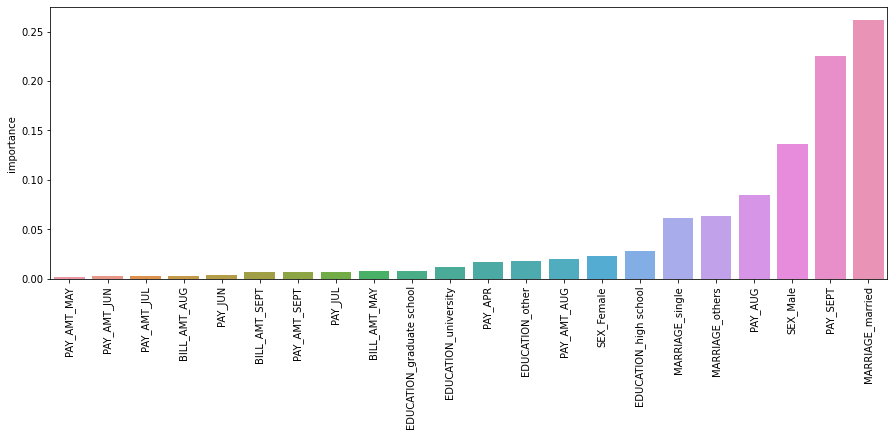

In [92]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [93]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [94]:
# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1543min 

score matrix for train
********************************************************************************
The accuracy is  0.998214851285595
The precision is  0.9985557481224726
The recall is  0.9978639879921487
The f1 is  0.9982097482097483
the auc  is  0.9982139745808294

confusion_matrix 
  [[17384    25]
 [   37 17285]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17409
           1       1.00      1.00      1.00     17322

    accuracy                           1.00     34731
   macro avg       1.00      1.00      1.00     34731
weighted avg       1.00      1.00      1.00     34731



score matrix for test
********************************************************************************
The accuracy is  0.8786386801416601
The precision is  0.9124277995155581
The recall is  0.8396776406035665
The f1 is  0.8745423698544513
the auc  is  0.8789336854018702

confusion_matrix 
  [[5

### implementing gridsearch for hyperparameter tuning in Random Forest

In [95]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=3,verbose=5,n_jobs=-1)

In [96]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 1.8097min 

score matrix for train
********************************************************************************
The accuracy is  0.9466758803374506
The precision is  0.986784140969163
The recall is  0.9052072508948158
The f1 is  0.9442370227628567
the auc  is  0.9465722623593501

confusion_matrix 
  [[17199   210]
 [ 1642 15680]]

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17409
           1       0.99      0.91      0.94     17322

    accuracy                           0.95     34731
   macro avg       0.95      0.95      0.95     34731
weighted avg       0.95      0.95      0.95     34731



score matrix for test
********************************************************************************
The accuracy is  0.8716420488900406
The precision is  0.9113971980310488
The recall is  0.8254458161865569
The f1 is  0.8662947633615

In [97]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}

In [98]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150)

In [99]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150)  



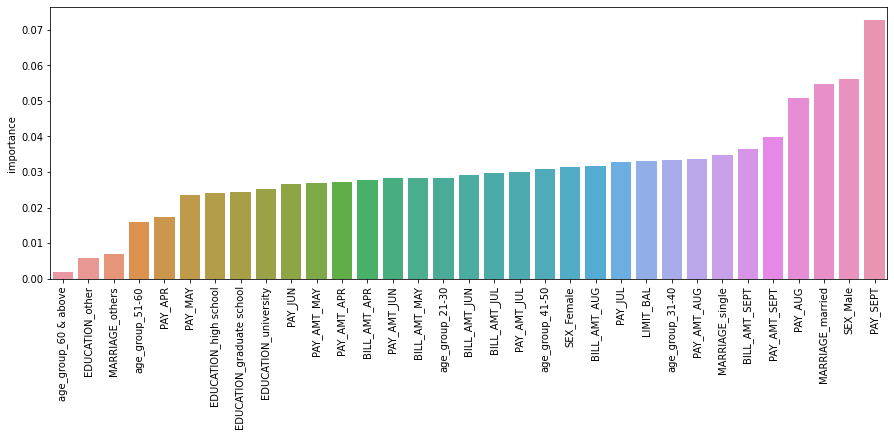

In [100]:
#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [101]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [102]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 1.6872min 

score matrix for train
********************************************************************************
The accuracy is  0.875730615300452
The precision is  0.9460219478737997
The recall is  0.7962706384944002
The f1 is  0.8647106764466178
the auc  is  0.8755320680552878

confusion_matrix 
  [[16622   787]
 [ 3529 13793]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.95      0.89     17409
           1       0.95      0.80      0.86     17322

    accuracy                           0.88     34731
   macro avg       0.89      0.88      0.87     34731
weighted avg       0.89      0.88      0.87     34731



score matrix for test
********************************************************************************
The accuracy is  0.8683596786732314
The precision is  0.942299794661191
The recall is  0.7868655692729767
The f1 is  0.8575967108951597
the auc  is  0.8689767358984553

confusion_matrix 
  [[54

### Hyperparameter tuning for SVM

In [103]:
params={'C':[0.1,1,10],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params,scoring='recall')

In [104]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 21.0262min 

score matrix for train
********************************************************************************
The accuracy is  0.8912498920272955
The precision is  0.9537080458230053
The recall is  0.8218450525343494
The f1 is  0.8828800893050948
the auc  is  0.8910764696298032

confusion_matrix 
  [[16718   691]
 [ 3086 14236]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     17409
           1       0.95      0.82      0.88     17322

    accuracy                           0.89     34731
   macro avg       0.90      0.89      0.89     34731
weighted avg       0.90      0.89      0.89     34731



score matrix for test
********************************************************************************
The accuracy is  0.8666321154012265
The precision is  0.9305220883534137
The recall is  0.7945816186556928
The f1 is  0.8571957084720682
the auc  is  0.8671776674653573

confusion_matrix 
  [

In [105]:
#getting the best estimator
svc_grid_model.best_estimator_

SVC(C=10)

In [106]:
#getting the best parameter
svc_grid_model.best_params_

{'C': 10, 'kernel': 'rbf'}

---
#XGboost
---

In [107]:
from xgboost import XGBClassifier

In [108]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [109]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

[13:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 0.1312min 

score matrix for train
********************************************************************************
The accuracy is  0.92139587112378
The precision is  0.9703455389375967
The recall is  0.8689527768156102
The f1 is  0.9168544801120788
the auc  is  0.9212648311672974

confusion_matrix 
  [[16949   460]
 [ 2270 15052]]

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.97      0.93     17409
           1       0.97      0.87      0.92     17322

    accuracy                           0.92     34731
   macro avg       0.93      0.92      0.92     34731
weighted avg       0.93      0.92      0.92 

### Hyperparameter tuning for Xgboost

In [110]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [111]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[13:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 4.2534min 

score matrix for train
********************************************************************************
The accuracy is  0.9912182200339754
The precision is  0.9972532289170709
The recall is  0.9851056459993073
The f1 is  0.9911422182208929
the auc  is  0.9912029464989931

confusion_matrix 
  [[17362    47]
 [  258 17064]]

Classification Report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17409
           1       1.00      0.99      0.99     17322

    accuracy                           0.99     34731
   macro avg       0.99      0.99   

In [112]:
#getting the best estimator
grid_xgboost_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)  



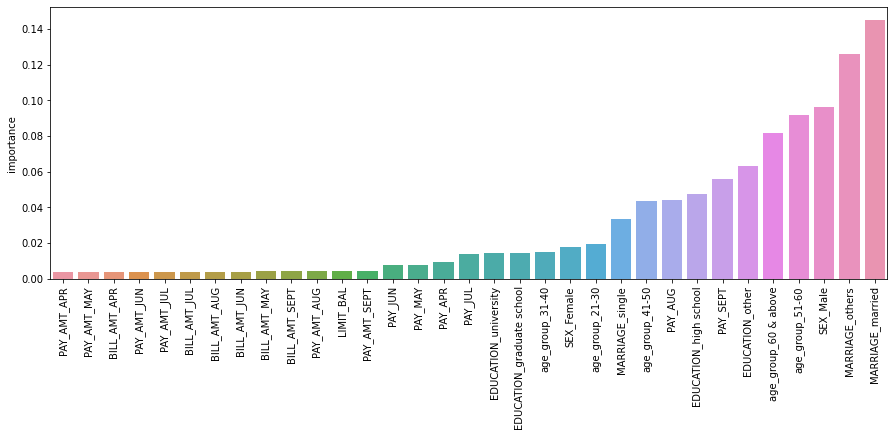

In [114]:
#visaulizing feature importance
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [115]:
!pip install catboost

In [116]:
from catboost import CatBoostClassifier

In [117]:
cb_model=CatBoostClassifier(verbose=0)

In [118]:
cb_model=CatBoostClassifier()

In [119]:
# training and evaluating the cb model
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.046862
0:	learn: 0.6494661	total: 179ms	remaining: 2m 58s
1:	learn: 0.6132969	total: 201ms	remaining: 1m 40s
2:	learn: 0.5878250	total: 224ms	remaining: 1m 14s
3:	learn: 0.5658075	total: 244ms	remaining: 1m
4:	learn: 0.5550976	total: 261ms	remaining: 51.8s
5:	learn: 0.5412819	total: 278ms	remaining: 46s
6:	learn: 0.5331448	total: 295ms	remaining: 41.8s
7:	learn: 0.5209018	total: 312ms	remaining: 38.6s
8:	learn: 0.4999412	total: 328ms	remaining: 36.1s
9:	learn: 0.4839426	total: 344ms	remaining: 34.1s
10:	learn: 0.4701519	total: 361ms	remaining: 32.5s
11:	learn: 0.4633226	total: 378ms	remaining: 31.1s
12:	learn: 0.4588975	total: 401ms	remaining: 30.4s
13:	learn: 0.4527916	total: 426ms	remaining: 30s
14:	learn: 0.4424016	total: 446ms	remaining: 29.3s
15:	learn: 0.4302938	total: 462ms	remaining: 28.4s
16:	learn: 0.4223341	total: 479ms	remaining: 27.7s
17:	learn: 0.4140859	total: 500ms	remaining: 27.3s
18:	learn: 0.4114180	total: 521ms	remaining: 26.9s
19:	learn: 0.40

165:	learn: 0.3033332	total: 4.4s	remaining: 22.1s
166:	learn: 0.3032138	total: 4.47s	remaining: 22.3s
167:	learn: 0.3031129	total: 4.5s	remaining: 22.3s
168:	learn: 0.3030437	total: 4.52s	remaining: 22.2s
169:	learn: 0.3029572	total: 4.56s	remaining: 22.3s
170:	learn: 0.3028872	total: 4.62s	remaining: 22.4s
171:	learn: 0.3027828	total: 4.67s	remaining: 22.5s
172:	learn: 0.3026827	total: 4.7s	remaining: 22.5s
173:	learn: 0.3025943	total: 4.75s	remaining: 22.6s
174:	learn: 0.3024548	total: 4.8s	remaining: 22.6s
175:	learn: 0.3023658	total: 4.86s	remaining: 22.8s
176:	learn: 0.3022548	total: 4.93s	remaining: 22.9s
177:	learn: 0.3021691	total: 4.96s	remaining: 22.9s
178:	learn: 0.3020801	total: 4.98s	remaining: 22.9s
179:	learn: 0.3019575	total: 5s	remaining: 22.8s
180:	learn: 0.3018860	total: 5.02s	remaining: 22.7s
181:	learn: 0.3017364	total: 5.05s	remaining: 22.7s
182:	learn: 0.3015376	total: 5.08s	remaining: 22.7s
183:	learn: 0.3014107	total: 5.12s	remaining: 22.7s
184:	learn: 0.30134

331:	learn: 0.2838085	total: 9.91s	remaining: 19.9s
332:	learn: 0.2837251	total: 9.94s	remaining: 19.9s
333:	learn: 0.2836347	total: 9.97s	remaining: 19.9s
334:	learn: 0.2835396	total: 10s	remaining: 19.9s
335:	learn: 0.2834113	total: 10s	remaining: 19.8s
336:	learn: 0.2833279	total: 10.1s	remaining: 19.8s
337:	learn: 0.2832015	total: 10.1s	remaining: 19.8s
338:	learn: 0.2831019	total: 10.1s	remaining: 19.7s
339:	learn: 0.2830315	total: 10.2s	remaining: 19.7s
340:	learn: 0.2829333	total: 10.2s	remaining: 19.7s
341:	learn: 0.2828345	total: 10.2s	remaining: 19.6s
342:	learn: 0.2827539	total: 10.2s	remaining: 19.6s
343:	learn: 0.2826678	total: 10.2s	remaining: 19.5s
344:	learn: 0.2823210	total: 10.3s	remaining: 19.5s
345:	learn: 0.2822440	total: 10.3s	remaining: 19.5s
346:	learn: 0.2821841	total: 10.3s	remaining: 19.4s
347:	learn: 0.2821298	total: 10.3s	remaining: 19.4s
348:	learn: 0.2820701	total: 10.4s	remaining: 19.3s
349:	learn: 0.2819704	total: 10.4s	remaining: 19.3s
350:	learn: 0.28

496:	learn: 0.2680612	total: 14.2s	remaining: 14.4s
497:	learn: 0.2680058	total: 14.2s	remaining: 14.4s
498:	learn: 0.2679309	total: 14.3s	remaining: 14.3s
499:	learn: 0.2678779	total: 14.3s	remaining: 14.3s
500:	learn: 0.2677955	total: 14.3s	remaining: 14.2s
501:	learn: 0.2677103	total: 14.3s	remaining: 14.2s
502:	learn: 0.2676325	total: 14.3s	remaining: 14.2s
503:	learn: 0.2675764	total: 14.3s	remaining: 14.1s
504:	learn: 0.2674899	total: 14.4s	remaining: 14.1s
505:	learn: 0.2674000	total: 14.4s	remaining: 14s
506:	learn: 0.2673197	total: 14.4s	remaining: 14s
507:	learn: 0.2672395	total: 14.4s	remaining: 14s
508:	learn: 0.2671705	total: 14.4s	remaining: 13.9s
509:	learn: 0.2670773	total: 14.5s	remaining: 13.9s
510:	learn: 0.2669923	total: 14.5s	remaining: 13.8s
511:	learn: 0.2669150	total: 14.5s	remaining: 13.8s
512:	learn: 0.2668049	total: 14.5s	remaining: 13.8s
513:	learn: 0.2667361	total: 14.5s	remaining: 13.7s
514:	learn: 0.2666601	total: 14.5s	remaining: 13.7s
515:	learn: 0.2665

659:	learn: 0.2557286	total: 17.4s	remaining: 8.98s
660:	learn: 0.2556691	total: 17.4s	remaining: 8.95s
661:	learn: 0.2556117	total: 17.5s	remaining: 8.92s
662:	learn: 0.2555480	total: 17.5s	remaining: 8.89s
663:	learn: 0.2554816	total: 17.5s	remaining: 8.85s
664:	learn: 0.2554073	total: 17.5s	remaining: 8.82s
665:	learn: 0.2553571	total: 17.5s	remaining: 8.79s
666:	learn: 0.2553245	total: 17.5s	remaining: 8.76s
667:	learn: 0.2552532	total: 17.6s	remaining: 8.73s
668:	learn: 0.2551812	total: 17.6s	remaining: 8.7s
669:	learn: 0.2551278	total: 17.6s	remaining: 8.66s
670:	learn: 0.2550794	total: 17.6s	remaining: 8.63s
671:	learn: 0.2549844	total: 17.6s	remaining: 8.6s
672:	learn: 0.2549146	total: 17.6s	remaining: 8.57s
673:	learn: 0.2548672	total: 17.7s	remaining: 8.54s
674:	learn: 0.2548109	total: 17.7s	remaining: 8.51s
675:	learn: 0.2546946	total: 17.7s	remaining: 8.48s
676:	learn: 0.2546451	total: 17.7s	remaining: 8.45s
677:	learn: 0.2545762	total: 17.7s	remaining: 8.42s
678:	learn: 0.

824:	learn: 0.2445388	total: 20.2s	remaining: 4.29s
825:	learn: 0.2444530	total: 20.2s	remaining: 4.26s
826:	learn: 0.2443966	total: 20.2s	remaining: 4.24s
827:	learn: 0.2443320	total: 20.3s	remaining: 4.21s
828:	learn: 0.2442530	total: 20.3s	remaining: 4.18s
829:	learn: 0.2441836	total: 20.3s	remaining: 4.16s
830:	learn: 0.2441318	total: 20.3s	remaining: 4.13s
831:	learn: 0.2440859	total: 20.3s	remaining: 4.1s
832:	learn: 0.2440294	total: 20.3s	remaining: 4.08s
833:	learn: 0.2439829	total: 20.4s	remaining: 4.05s
834:	learn: 0.2439282	total: 20.4s	remaining: 4.03s
835:	learn: 0.2438682	total: 20.4s	remaining: 4s
836:	learn: 0.2437711	total: 20.4s	remaining: 3.97s
837:	learn: 0.2437236	total: 20.4s	remaining: 3.95s
838:	learn: 0.2436564	total: 20.4s	remaining: 3.92s
839:	learn: 0.2435933	total: 20.5s	remaining: 3.9s
840:	learn: 0.2435069	total: 20.5s	remaining: 3.87s
841:	learn: 0.2433965	total: 20.5s	remaining: 3.85s
842:	learn: 0.2433614	total: 20.5s	remaining: 3.82s
843:	learn: 0.243

995:	learn: 0.2340381	total: 23.4s	remaining: 94ms
996:	learn: 0.2339902	total: 23.4s	remaining: 70.5ms
997:	learn: 0.2339357	total: 23.4s	remaining: 47ms
998:	learn: 0.2338366	total: 23.4s	remaining: 23.5ms
999:	learn: 0.2337954	total: 23.5s	remaining: 0us
Training time: 0.4077min 

score matrix for train
********************************************************************************
The accuracy is  0.9046960928277331
The precision is  0.958327881721837
The recall is  0.845687564946311
The f1 is  0.89849116781158
the auc  is  0.9045486477727132

confusion_matrix 
  [[16772   637]
 [ 2673 14649]]

Classification Report

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     17409
           1       0.96      0.85      0.90     17322

    accuracy                           0.90     34731
   macro avg       0.91      0.90      0.90     34731
weighted avg       0.91      0.90      0.90     34731



score matrix for test
*******************

### Hyperparameter tuning for Catboost

In [120]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='recall',verbose=0,n_jobs=-1)

In [121]:
# training and evaluating the catboost model with hyperparameter tuing
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.266898
0:	learn: 0.5275895	total: 72.2ms	remaining: 10.8s
1:	learn: 0.4485596	total: 120ms	remaining: 8.9s
2:	learn: 0.3955235	total: 199ms	remaining: 9.75s
3:	learn: 0.3660699	total: 266ms	remaining: 9.69s
4:	learn: 0.3554602	total: 315ms	remaining: 9.13s
5:	learn: 0.3328233	total: 363ms	remaining: 8.71s
6:	learn: 0.3273670	total: 417ms	remaining: 8.51s
7:	learn: 0.3107722	total: 472ms	remaining: 8.38s
8:	learn: 0.3077246	total: 521ms	remaining: 8.16s
9:	learn: 0.3059681	total: 571ms	remaining: 7.99s
10:	learn: 0.3024090	total: 622ms	remaining: 7.86s
11:	learn: 0.2993628	total: 689ms	remaining: 7.93s
12:	learn: 0.2964954	total: 738ms	remaining: 7.78s
13:	learn: 0.2943765	total: 786ms	remaining: 7.63s
14:	learn: 0.2897257	total: 839ms	remaining: 7.55s
15:	learn: 0.2885957	total: 898ms	remaining: 7.52s
16:	learn: 0.2868841	total: 946ms	remaining: 7.4s
17:	learn: 0.2857889	total: 993ms	remaining: 7.28s
18:	learn: 0.2845678	total: 1.04s	remaining: 7.18s
19:	learn: 0

The accuracy is  0.8729377213440442
The precision is  0.9229873908826383
The recall is  0.815843621399177
The f1 is  0.8661144989533085
the auc  is  0.8733700265394493

confusion_matrix 
  [[5348  397]
 [1074 4758]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5745
           1       0.92      0.82      0.87      5832

    accuracy                           0.87     11577
   macro avg       0.88      0.87      0.87     11577
weighted avg       0.88      0.87      0.87     11577


Classification Report


In [122]:
#getting the best estimator
optimal_catboost_model=grid_cb_model.best_estimator_

In [123]:
#getting the featre importance
grid_cb_model.best_estimator_.feature_importances_

array([ 2.47638012,  2.49728611,  1.31384345,  0.76454629,  0.47398122,
        0.78203295,  0.53107982,  1.67485004,  1.046704  ,  0.95806488,
        1.02469722,  0.95023135,  0.99730326,  1.83933728,  1.37114965,
        1.36208412,  1.28630341,  1.49723156,  1.68070486,  6.14579888,
        5.43939853,  8.96675629,  6.85507848,  1.45223719, 10.53425912,
        5.67073236,  0.53846603,  6.09055957,  7.90605632,  7.64534838,
        5.43172595,  2.45590543,  0.33986586])

==========================Features Importance============================




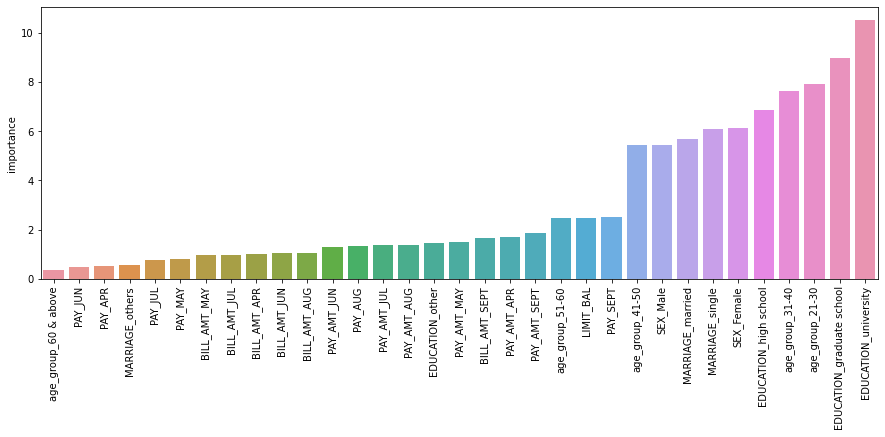

In [124]:
# visualizing feature importance
get_features_importance(optimal_catboost_model,X_train)

In [125]:
grid_cb_model.best_params_

{'max_depth': 9, 'n_estimators': 150}

---
# LightGBM
---

In [127]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [128]:
import lightgbm as lgb

In [129]:
lgbc=lgb.LGBMClassifier()

In [130]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc,X_train,X_test,y_train,y_test)

Training time: 0.0144min 

score matrix for train
********************************************************************************
The accuracy is  0.8887449252828885
The precision is  0.9456291390728477
The recall is  0.8243274448677982
The f1 is  0.8808216643020172
the auc  is  0.8885839648372535

confusion_matrix 
  [[16588   821]
 [ 3043 14279]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.95      0.90     17409
           1       0.95      0.82      0.88     17322

    accuracy                           0.89     34731
   macro avg       0.90      0.89      0.89     34731
weighted avg       0.90      0.89      0.89     34731



score matrix for test
********************************************************************************
The accuracy is  0.8755290662520515
The precision is  0.9310818770861967
The recall is  0.8131001371742113
The f1 is  0.8681006864988559
the auc  is  0.876001765715043

confusion_matrix 
  [[5

In [131]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [132]:
# training and evaluating the lgbr_grid
run_and_evaluate_model(lgbc_grid,X_train,X_test,y_train,y_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 0.4149min 

score matrix for train
********************************************************************************
The accuracy is  0.8973827416429127
The precision is  0.9545394476014273
The recall is  0.8339683639302621
The f1 is  0.8901897954153315
the auc  is  0.8972242876575888

confusion_matrix 
  [[16721   688]
 [ 2876 14446]]

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     17409
           1       0.95      0.83      0.89     17322

    accuracy                           0.90     34731
   macro avg       0.90      0.90      0.90     34731
weighted avg       0.90      0.90      0.90     34731



score matrix for test
********************************************************************************
The accuracy is  0.8772566295240564
The precision is  0.9335561234519363
The recall is  0.8143004115226338
The f1 is  0.869859877278

==========================Features Importance============================

 LGBMClassifier(max_depth=15, n_estimators=150)  



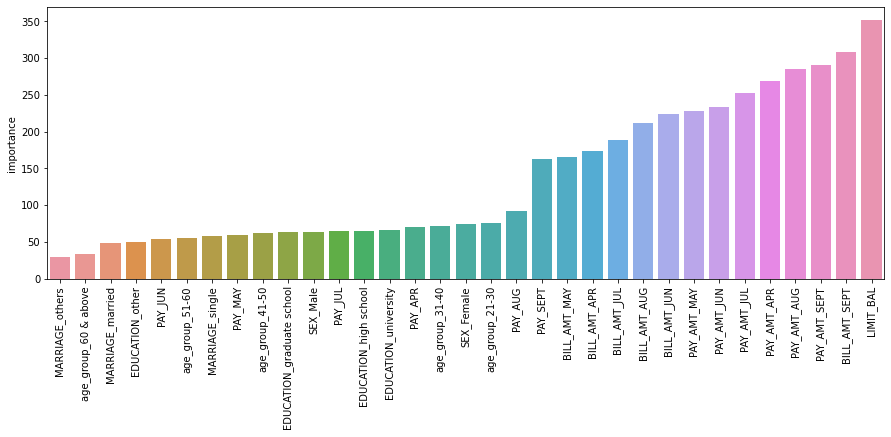

In [133]:
get_features_importance(lgbc_grid.best_estimator_,X_train)

# Model's Score matrix

In [134]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [135]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost','LightGBM','Grid LightGBM']

In [136]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [137]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [138]:
matrix_df

Models  accuracy  precision    recall        f1   roc_auc
0   Logestic Regrestion  0.863004   0.953439  0.765432  0.849154  0.863743
1         grid_log_regg  0.863695   0.949873  0.770062  0.850568  0.864404
2         Desision Tree  0.822147   0.864541  0.767147  0.812937  0.822564
3         Random forest  0.878639   0.912428  0.839678  0.874542  0.878934
4    grid random forest  0.871642   0.911397  0.825446  0.866295  0.871992
5                   SVM  0.868360   0.942300  0.786866  0.857597  0.868977
6              Grid SVM  0.866632   0.930522  0.794582  0.857196  0.867178
7               XGboost  0.874752   0.926099  0.816529  0.867870  0.875193
8          Grid Xgboost  0.875615   0.921012  0.823731  0.869660  0.876008
9              CATBoost  0.875097   0.929831  0.813443  0.867752  0.875564
10        Grid Catboost  0.872938   0.922987  0.815844  0.866114  0.873370
11             LightGBM  0.875529   0.931082  0.813100  0.868101  0.876002
12        Grid LightGBM  0.877257   0.933556  0.814300  0.869860  0.877733

# LIME
---

In [139]:
LimeTabularExplainer_table(grid_rfc_model.best_estimator_,instance=2,num_features=5,dependent_var='Defaulters')

In [140]:
LimeTabularExplainer_table(grid_xgboost_model.best_estimator_,instance=2,num_features=5,dependent_var='Defaulters')

# ROC curve for all the models
---

In [141]:
log_reg_best=grid_log_model.best_estimator_
rfc_best=grid_rfc_model.best_estimator_
xgbc_best=grid_xgboost_model.best_estimator_
cat_best=grid_cb_model.best_estimator_
lgbc_best=lgbc_grid.best_estimator_



In [142]:
y_preds_proba_lr = log_reg_best.predict_proba(scaled_X_test)[::,1]
y_preds_proba_dt = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_cat = cat_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]


In [143]:
from sklearn.metrics import roc_curve

In [144]:
classifiers_proba = [(log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dt), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (cat_best, y_preds_proba_cat),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

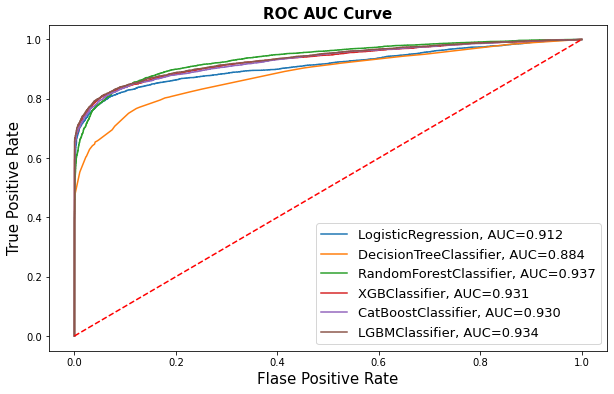

In [145]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()